>#  **<center>Daegu Apartment<center>**
---

# **<center>1. Business Problem<center>**

## **1.1. Background**

- Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 
- Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

## **1.2. Problem Statements**

Daegu has high demand for apartments, making it challenging for agents to compete. To maintain loyalty, they must set appropriate rental prices based on facilities. A model is needed to help agents set `competitive prices`, `achieve sales goals`, and `maintain customer satisfaction`.

## **1.3. Goals**

One of the biggest challenges for real estate agents, especially in the city of Daegu, South Korea, is determining the selling price of an apartment in accordance with the market price because the selling price is an important indicator for a residence to be sold. Before making a transaction, consumers will find out about the price of the apartment being sold and compare it with the prices of other apartments. Usually, the higher the price offered for an apartment, the consumers will expect higher facilities and quality. So as the number of apartments for sale increases, determining the right selling price to remain competitive in the environment in the city of Daegu, South Korea is very important to ensure that apartment prices in an area are still considered reasonable.

## **1.4. Stakeholders**

- Agen Real Estate

## **1.5. Analytical Approach**

So, what needs to be done to determine the right selling price for an apartment in the city of Daegu, South Korea is to carry out data analysis to explore and see patterns in the data and build a regression model as a method to test whether there is an influence between various features and the selling price of the apartment. expressed in the form of a mathematical equation. The regression model formed can also predict the selling price of apartments and so can help new apartment owners to determine the selling price of apartments.

## **1.5. Matric Evaluation**

The evaluation metrics used for the regression model are RMSE, MAE, and MAPE. However, MAPE was chosen as the most important evaluation metric to provide results that are easy to interpret and can help explain prediction errors to stakeholders, namely real estate agents. Apart from that, the regression model will be evaluated exploratively using residual plots. 

In the regression model there is a residual which is the difference between the predicted value and the actual value so that the residual is used to measure how close the predicted value is to reality. RMSE is the root of the mean square residual. MAE is the average of absolute errors and is a metric that is not sensitive to outliers. MAPE is the absolute average percentage error. The smaller the RMSE, MAE, and MAPE values, the better the model will be at predicting apartment prices.

Apart from that, the R-Squared and Adjusted R-Squared evaluation metrics can also be used if the best model chosen is a linear model. R-squared is a coefficient of determination used to measure how well the regression line represents the data. The R-Squared value has a range between 0 - 1 and the closer the value is to 1, the better the regression line will represent the data.

# **<center>2. Data Understanding<center>**

In [1]:
# Import library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Dataset obtained from the official website of the Korean government, namely data.go.kr from 2007 to 2017

Features:
- Hallway Type: Apartment type
- TimeToSubway: Time needed to the nearest subway station
- SubwayStation: The name of the nearest subway station
- N_FacilitiesNearBy(ETC): The number of facilities nearby
- N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby
- N_SchoolNearBy(University): The number of universities nearby
- N_Parkinglot(Basement): The number of the parking lot
- YearBuilt: The year the apartment was built
- N_FacilitiesInApt: Number of facilities in the apartment
- Size(sqft): The apartment size (in square feet)
- SalePrice: The apartment price (Won)


In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [3]:
df['SubwayStation'].unique()

array(['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
# Mengubah format penulisan pada feature TimeToSubway

df.loc[df['TimeToSubway']=='5min~10min','TimeToSubway']='5min-10min'
df.loc[df['TimeToSubway']=='10min~15min','TimeToSubway']='10min-15min'
df.loc[df['TimeToSubway']=='15min~20min','TimeToSubway']='15min-20min'

Previously, we will change the writing format in the TimeToSubway column which initially used '~' to '-'. Changing the writing format is carried out to match the writing format and avoid writing errors.

# **<center>3. Explanatory Data Analysis<center>**

## **3.1. Summary Statistics**

In [5]:
display(df.describe(include='O'), df.describe(include='number'))

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In general, the information obtained based on the data above is as follows:
* There are 4,123 data with 11 features in the dataset.
* The most common type of apartment is a terraced apartment 
* The majority of apartments in Daegu are quite close to the station because the majority only need 0-5 minutes to get to the station and Kyungbuk Uni Hospital Station is the closest station to the majority of apartments.
* Apartments in Daegu have an average of 2 facilities, 4 public offices, 3 universities, and 569 nearby basement parking spaces.
* The average apartment in Daegu was built in 2003 or can be said to be quite old because the oldest apartment in Daegu was built in 1978 and the newest apartment was built in 2015.
* Apartments in Daegu have an average of 6 facilities in the apartment where the number of facilities can be said to be quite large because the highest number of facilities in the apartment reaches 10 facilities.
* Apartment sizes and apartment prices in Daegu vary quite a bit with an average size of 954.63 square feet and an average price of 221,767.93 won so the average apartment price in Daegu is 232.31 won/square feet.

## **3.2. Data Distribution**

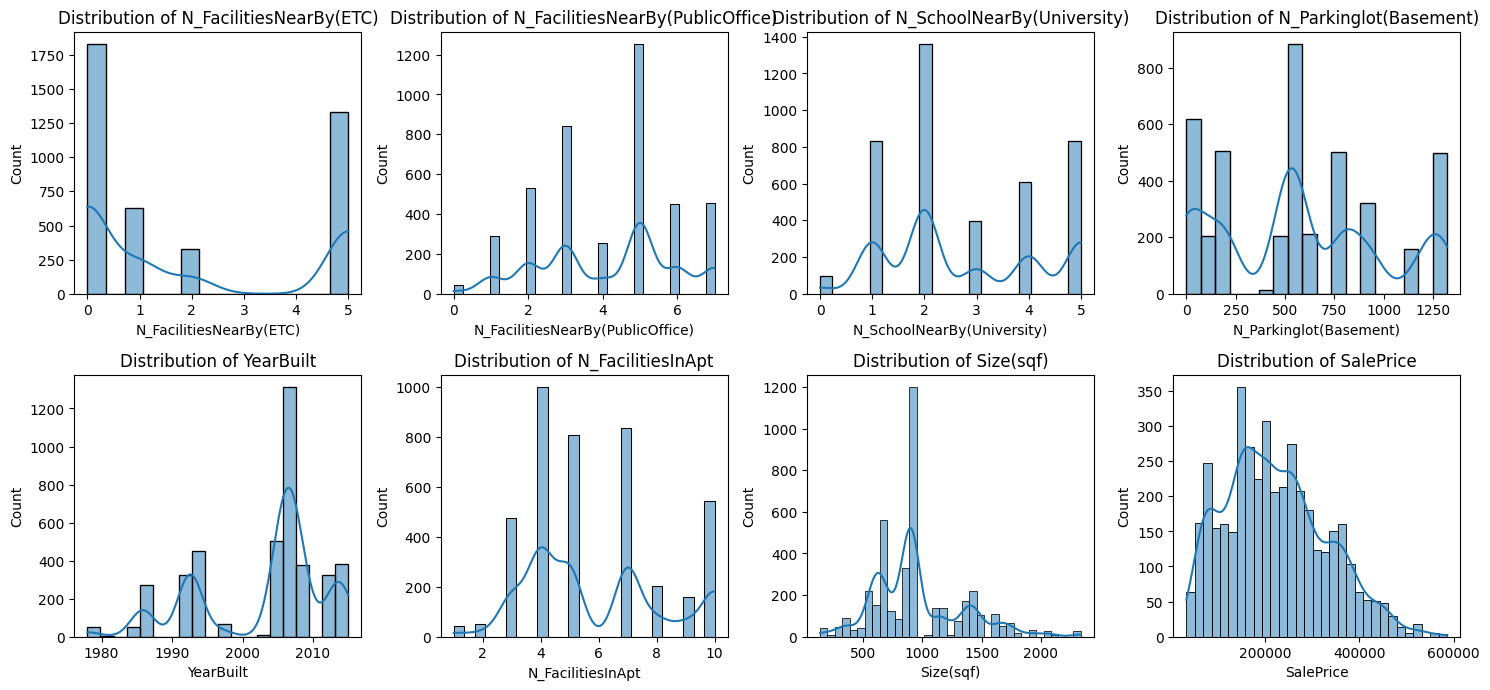

In [6]:
# Creating a list of numeric columns for distribution analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting the distributions of numeric columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

Based on the data distribution visualization above, here are some insights that we can gain:

- **N_FacilitiesNearBy(ETC)**: This data shows that the majority of properties have few or no additional facilities around them, with a small number of properties having up to 5 additional facilities.
- **N_FacilitiesNearBy(PublicOffice)**: The distribution shows a wider variation in the number of public office facilities around a property, with peaks at properties that have 2 and 5 facilities nearby.
- **N_SchoolNearBy(University)**: Most properties are located near a university or two, indicating they may appeal to the student rental market or families who value easily accessible higher education.
- **N_Parkinglot(Basement)**: This distribution is heavily skewed to the right, with most properties having a relatively small number of parking spaces, but with some properties offering a large number of parking spaces.
- **YearBuilt**: There is a peak in the distribution of properties built around the 2000s, indicating that there may have been a construction or apartment building boom during that period.
- **N_FacilitiesInApt**: Most properties appear to have a relatively small number of amenities in the apartment, with some properties offering more.
- **Size(sqf)**: Property sizes tend to cluster around lower values, with most properties being relatively moderate in size, and only a few being very large.
- **SalePrice**: Sales prices show a distribution that is skewed to the right, indicating that most properties are in the lower price range, with some properties having very high sale prices. This also indicates the presence of potential outliers at the right end of the distribution that may require further attention.

This insight can be used to determine price adjustment strategies, understand different market segments, and design appropriate marketing strategies. For example, a real estate agent may target properties with certain amenities that the market prefers or may recommend improvements to increase the resale value of properties with fewer amenities.

In [7]:
# Normality test feature YearBuilt, Size(Sqf), dan SalePrice

hasil=[]
for i in numeric_columns:
    stats,pval=normaltest(df[i])
    if pval>0.05:
        hasil.append('Distribusi normal')
    else:
        hasil.append('Tidak berdistribusi normal')

pd.DataFrame({'Kolom':numeric_columns, 'Distribusi':hasil})

,Kolom,Distribusi
0,N_FacilitiesNearBy(ETC),Tidak berdistribusi normal
1,N_FacilitiesNearBy(PublicOffice),Tidak berdistribusi normal
2,N_SchoolNearBy(University),Tidak berdistribusi normal
3,N_Parkinglot(Basement),Tidak berdistribusi normal
4,YearBuilt,Tidak berdistribusi normal
5,N_FacilitiesInApt,Tidak berdistribusi normal
6,Size(sqf),Tidak berdistribusi normal
7,SalePrice,Tidak berdistribusi normal


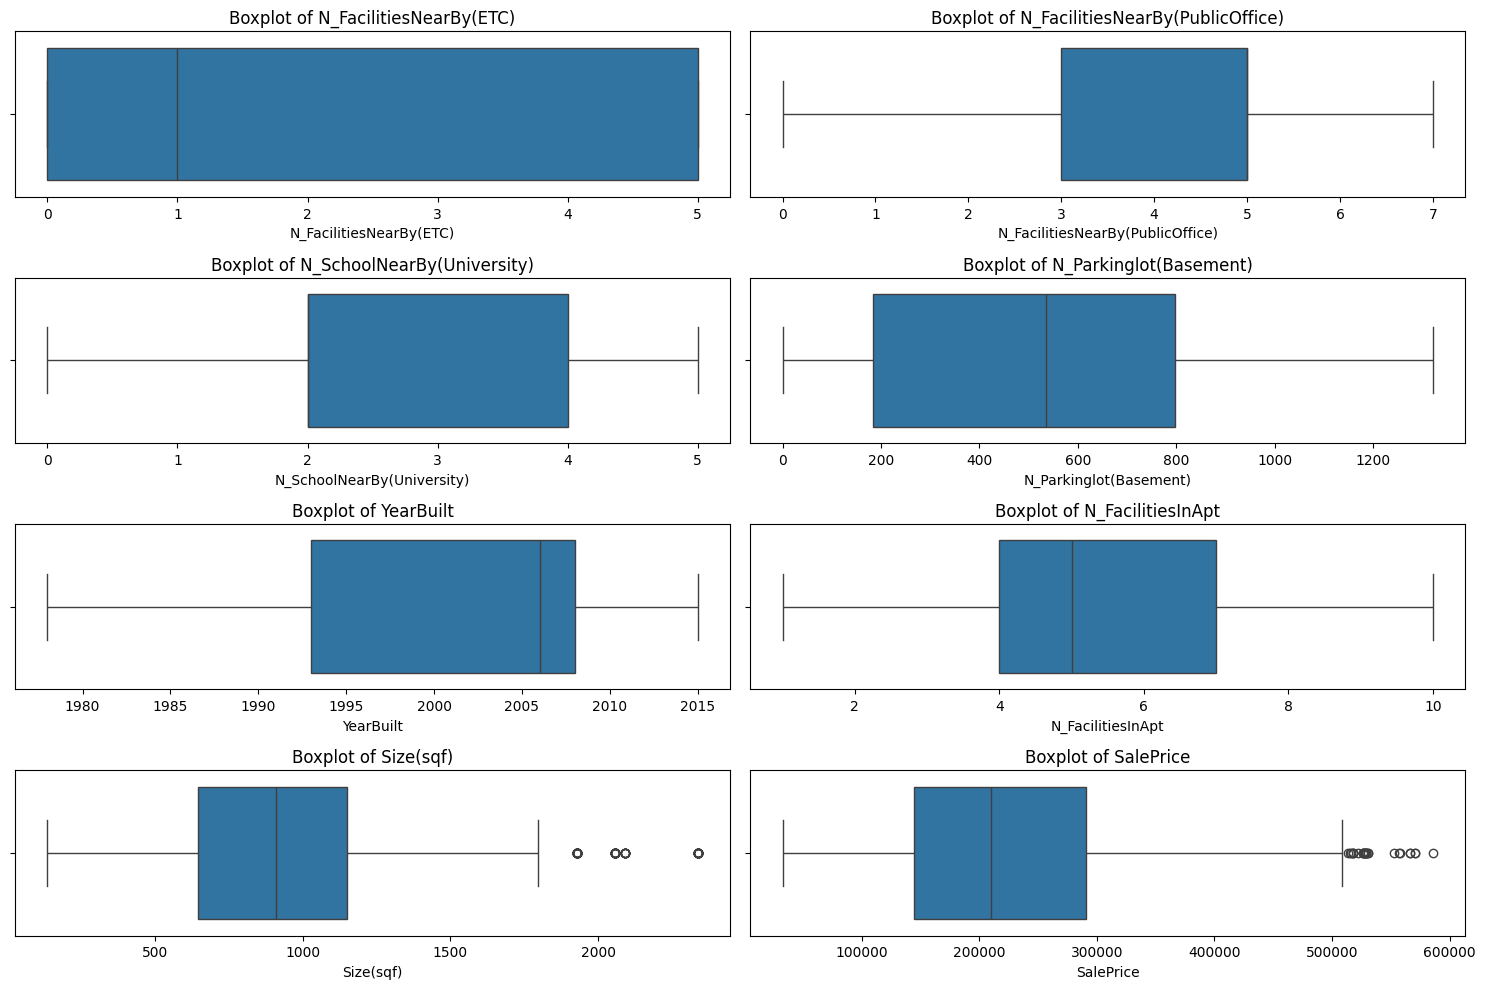

In [8]:
# Creating boxplots for the numerical variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

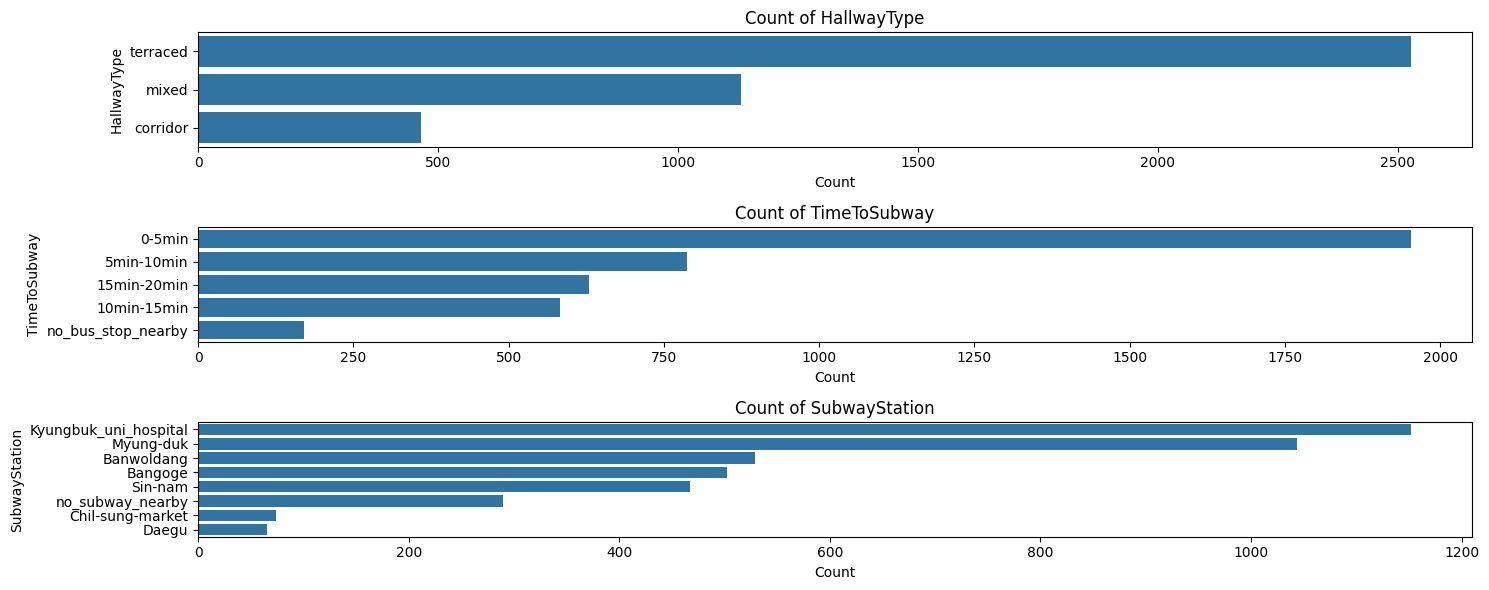

In [9]:
# Creating count plots for categorical variables
categorical_columns = ['HallwayType', 'TimeToSubway', 'SubwayStation']

plt.figure(figsize=(15, 2 * len(categorical_columns)))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(y=df[column], order = df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Based on the visualization of the distribution of categorical data provided, here are some insights that we can gain:
- **HallwayType**: The "terraced" hallway type is the most common, followed by "mixed" and "corridor". These preferences may reflect current design trends or the comfort associated with a particular type of hallway. For example, a "terraced" hallway may be preferred for privacy or aesthetics.
- **TimeToSubway**: Most properties are within a "0-5min" walk from a train station, indicating that public transport accessibility is a major factor in property selection. Properties with further access ("15min-20min" and "10min-15min") are fewer, which may affect their resale value.
- **SubwayStation**: "Kyungbuk_uni_hospital" station is the most frequently closest to the listed property, followed by "Myung-duk" and "Banwoldang". This suggests that the area around the station may be a highly desirable location or have a lot of new property development. In contrast, stations such as “Chil-sung-market” and “Daegu” are less frequently closest to listed properties, which could indicate areas with fewer real estate options or lower demand.

These insights are important for real estate agents who can use this information to adjust their marketing and pricing strategies. Properties with "terraced" alley types may be priced higher, while less ideal locations from public transportation may require a more competitive pricing strategy to attract buyers. Knowledge of popular train stations can also help real estate agents in targeting their ads or in making recommendations to potential buyers.

## **3.3. Data Correlation**

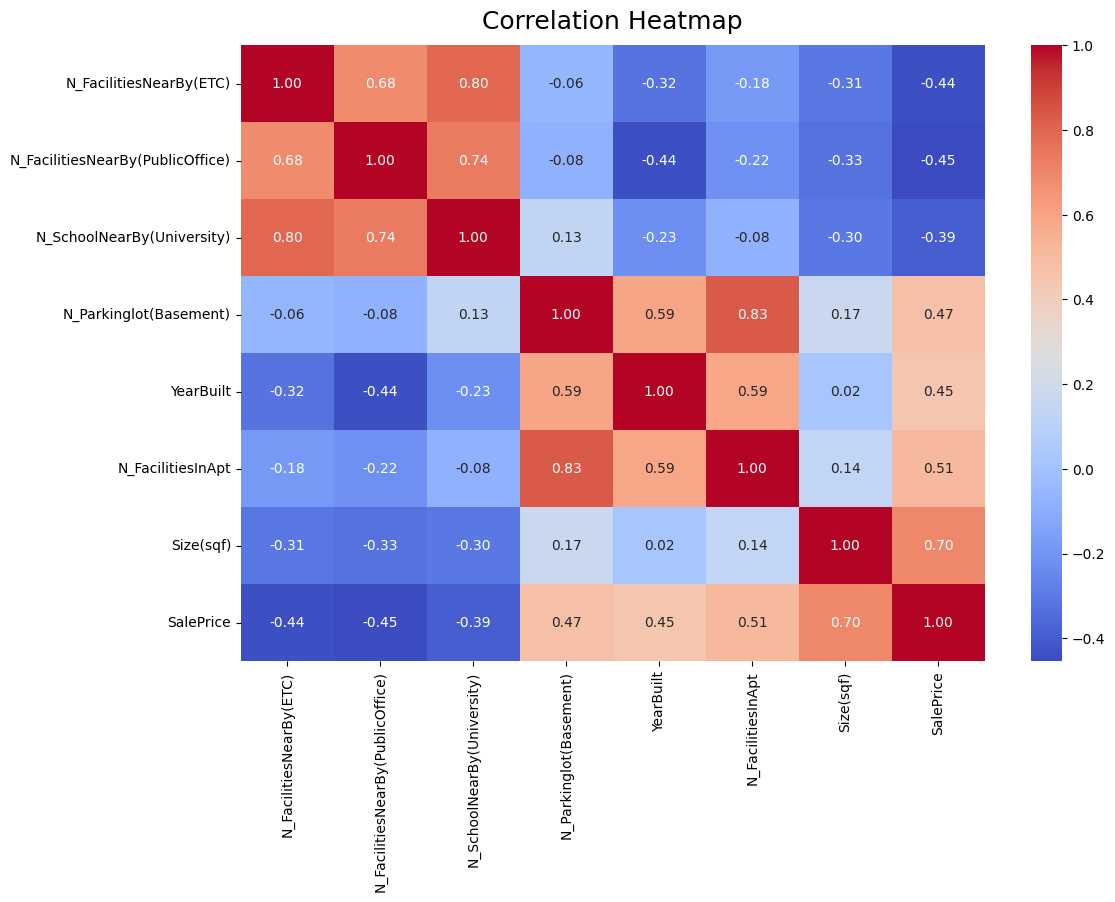

In [10]:
# Calculating the correlation matrix for the numeric variables in the dataset
correlation_matrix = df.select_dtypes(include='number').corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

* Overall, the correlation matrix shows that all features have a medium correlation (correlation value 0.3 to 0.7) with apartment prices and this means that all features have a relationship or connection with apartment prices. The highest correlation is owned by the size of the apartment which has a medium positive correlation, meaning that the size of the apartment is the feature most related to the price of the apartment and the larger the apartment, the more expensive the price of the apartment. 
* Other features that also have a medium positive correlation with apartment prices are the number of facilities in the apartment, year of construction, and number of basement parking spaces. This shows that the greater the number of facilities in the apartment, the newer the apartment, and the greater the number of basement parking spaces, the more expensive the apartment price will be.
* Features that have a medium negative correlation with apartment prices are the number of public office facilities closest to the apartment, the number of other facilities closest to the apartment, and the number of universities closest to the apartment. This shows that the greater the number of public office facilities, other facilities and universities near the apartment, the cheaper the apartment price will be.
* There is a strong correlation between the independent variables, namely the number of other closest facilities from the apartment with the number of universities closest to the apartment (correlation value=0.8) and other closest facilities by public office from the apartment with the number of universities closest to the apartment (correlation value=0.74 ). This indicates the existence of multicollinearity where two or more independent variables in the model have a high correlation with each other and can cause problems in regression analysis that uses the least squares method to estimate regression parameters such as linear regression or logistic regression because it can affect the interpretation of regression coefficients and make unstable estimates.

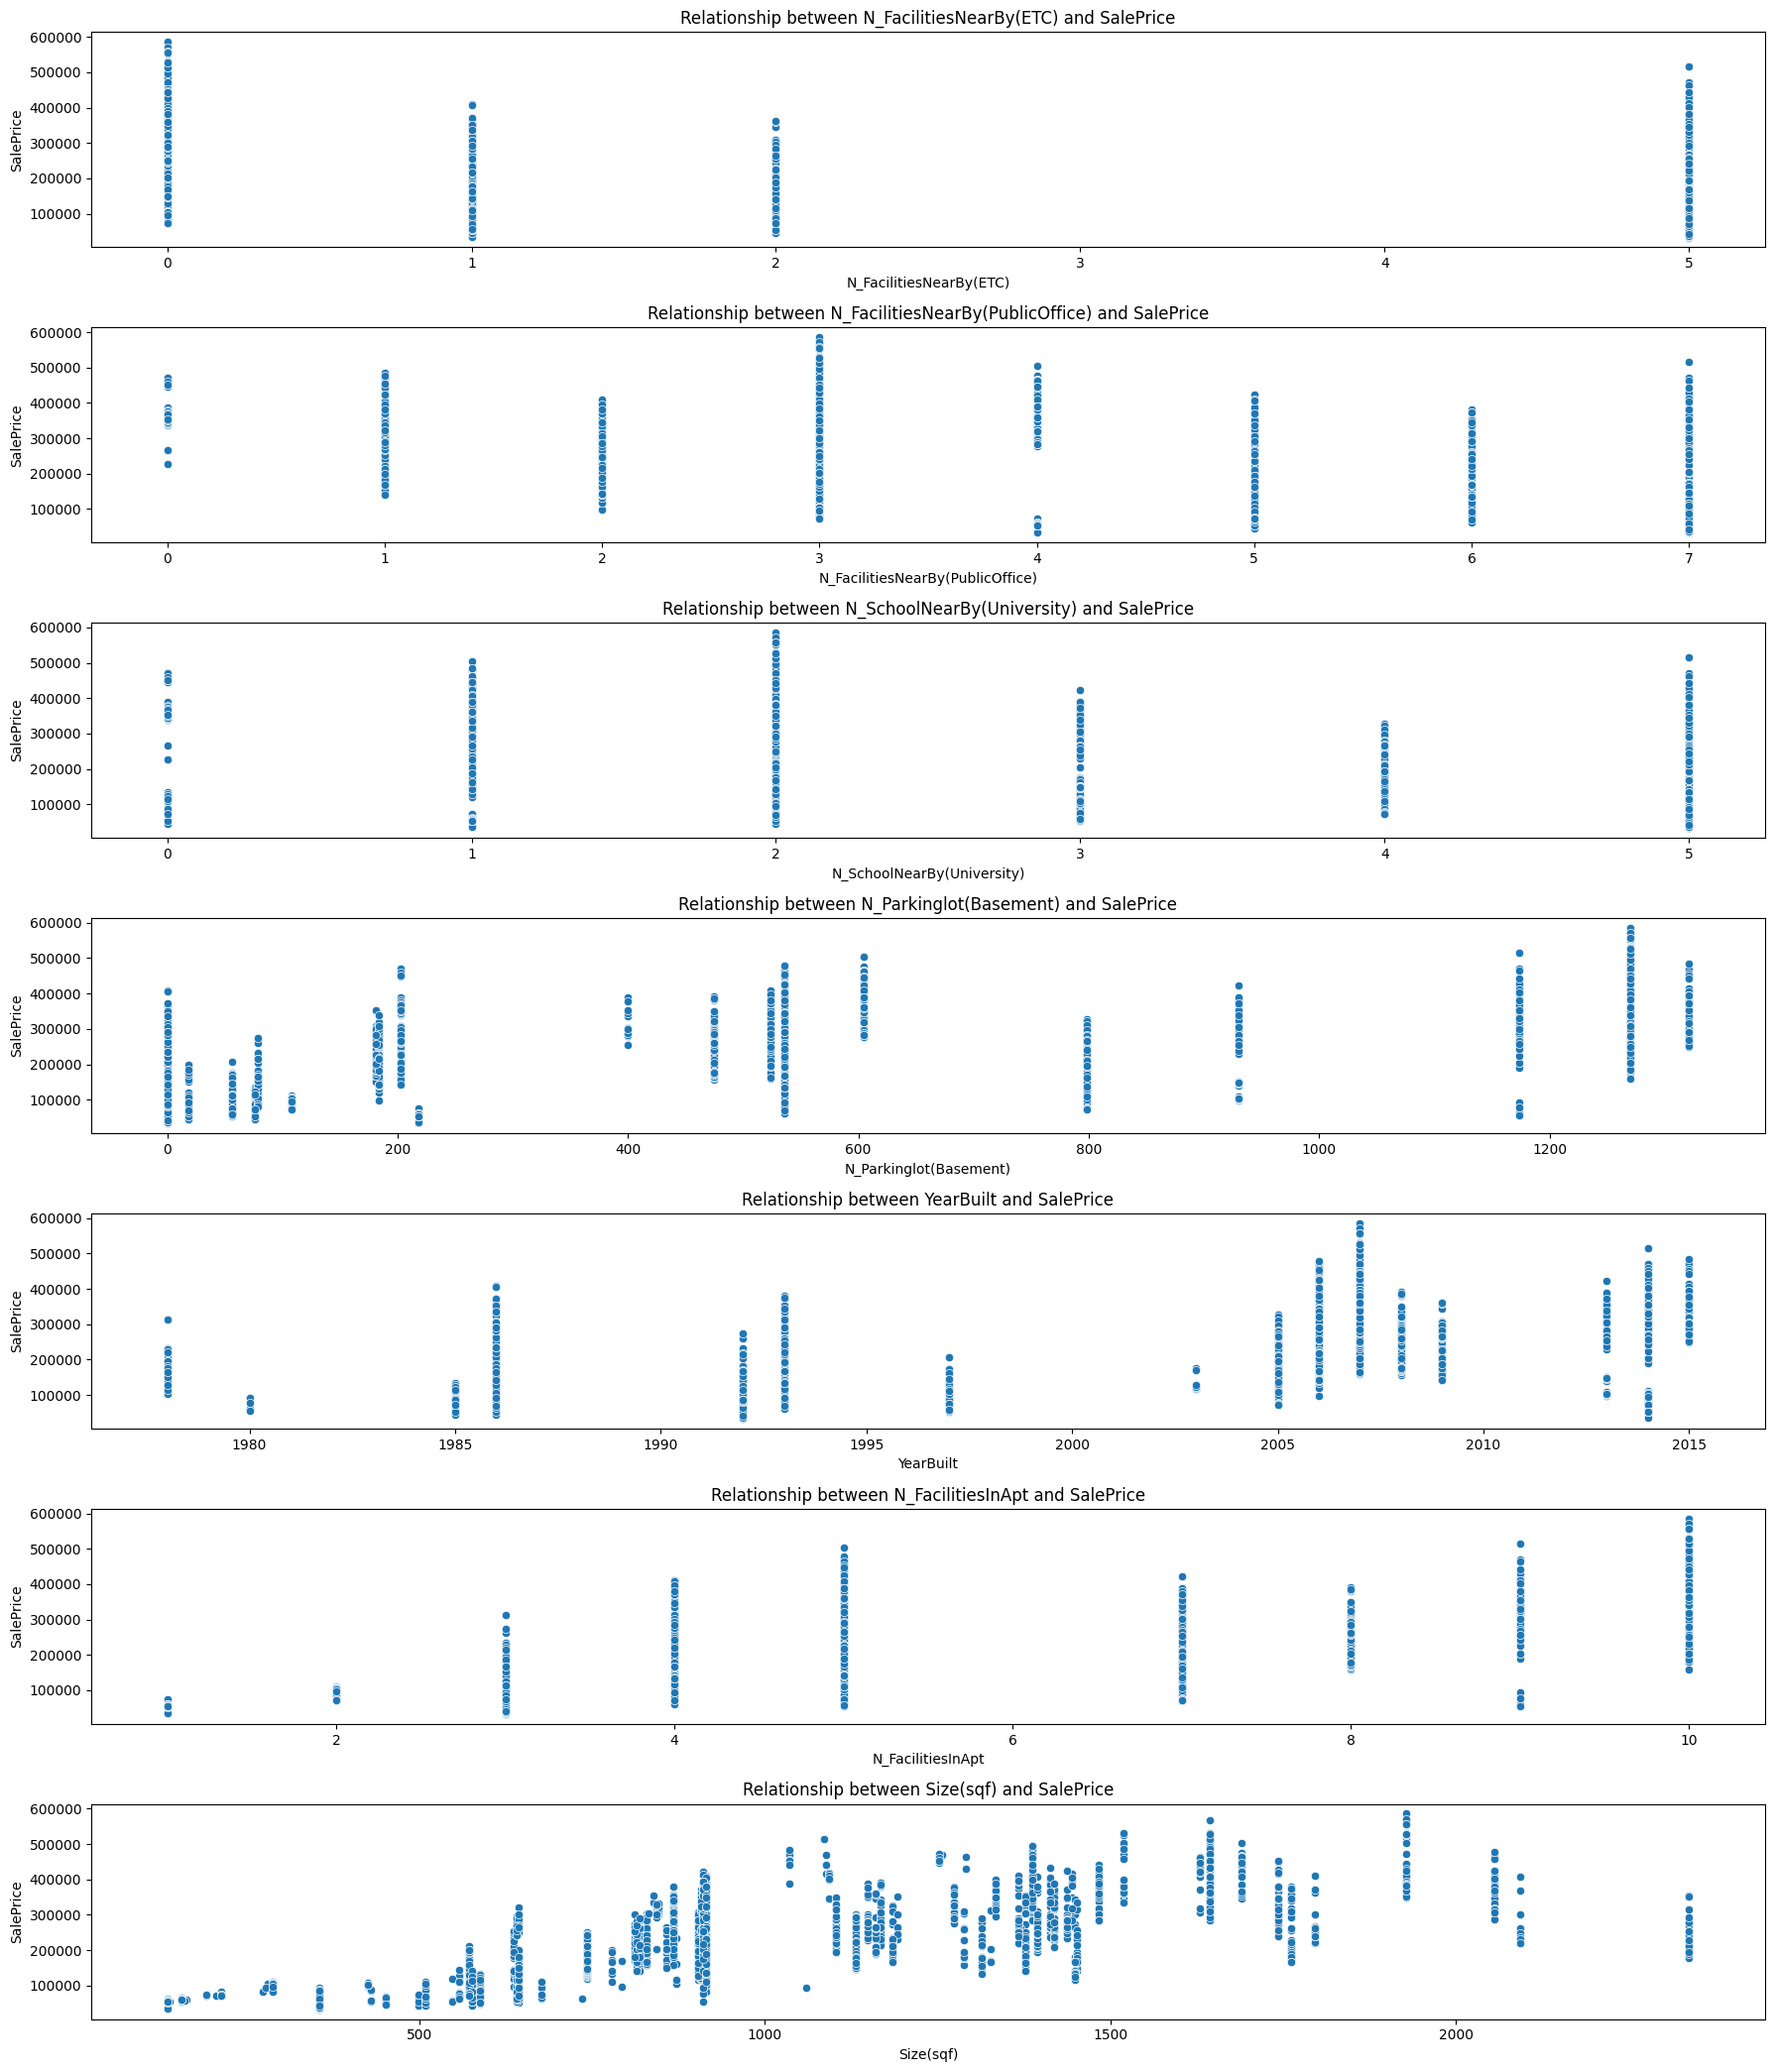

In [11]:
# Prepare a list of numeric and categorical columns for analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('SalePrice')  # Remove the target variable from the numeric columns list
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plotting the numeric features
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(18, 3*len(numeric_columns)))
for i, col in enumerate(numeric_columns):
    sns.scatterplot(data=df, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



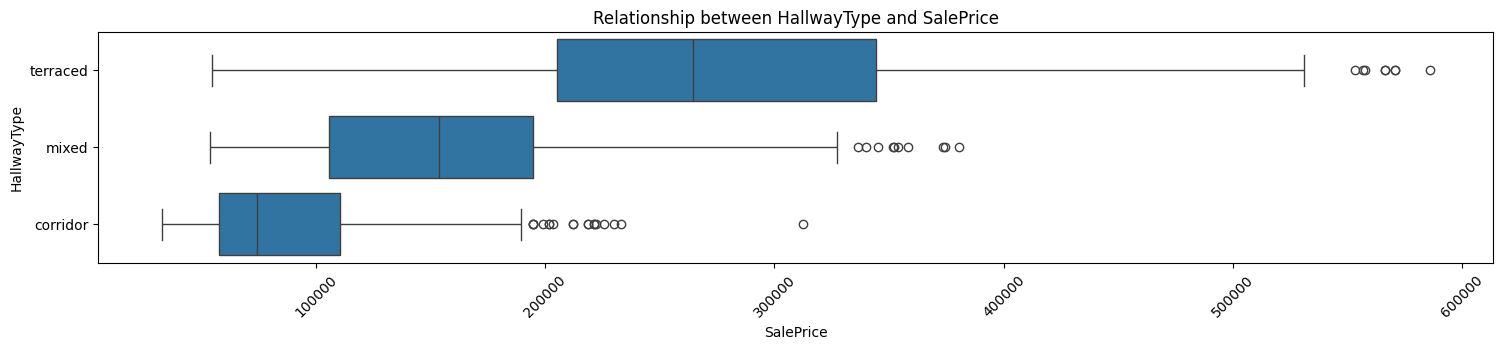

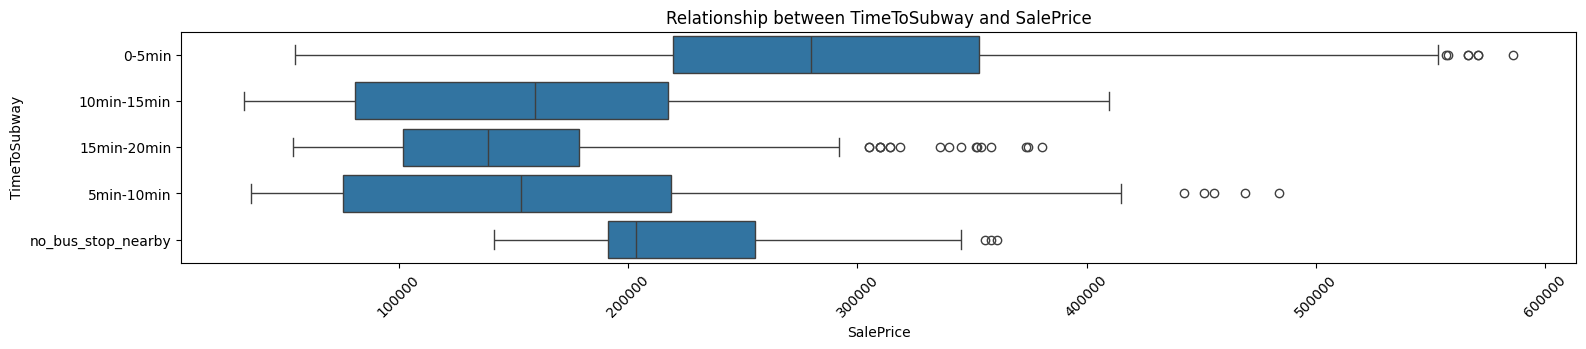

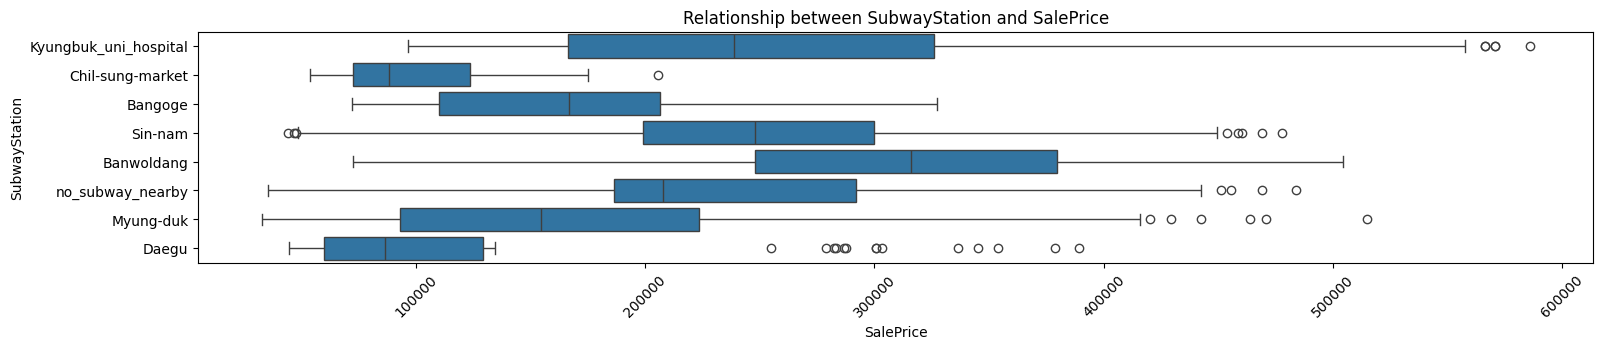

In [12]:
# Generating horizontal box plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(18, 3))
    sns.boxplot(data=df, y=col, x='SalePrice')
    plt.title(f'Relationship between {col} and SalePrice')
    plt.ylabel(col)
    plt.xlabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()


Based on the boxplots for the relationship between aisle type and selling price, time to train station and selling price, and train station and selling price, here are some insights we can get:
- **Relationship between Hallway Type and Selling Price**:
     - Properties with the "terraced" alley type appear to have a higher median selling price compared to "mixed" and "corridor". This could indicate a market preference or higher quality properties with "terraced" alley types.
     - There are quite a lot of outliers, especially in the "terraced" and "corridor" types, indicating some properties are selling at significantly higher prices than others in the same category. This could be due to unique features or a highly desirable location.
- **Relationship between Time to Train Station and Selling Price**:
     - Properties located within a 5-minute walk of a train station tend to have higher sale prices compared to those located further away. This emphasizes the importance of easy access to public transportation as a factor in property value.
     - There is no significant difference in sales price between properties located at a distance of 10-15 minutes and 15-20 minutes from the station, which may indicate that buyers consider this distance to be the upper limit of walkability to the train station.
- **Relationship between Train Station and Selling Price**:
     - There are significant variations in selling prices between different train stations. Properties close to “Kyungbuk_uni_hospital” and “Myung-duk” stations have a higher price distribution, which may indicate that these areas are more desirable or have a higher quality of life.
     - Stations such as "Daegu" have a lower median price and a narrower distribution, which could indicate that properties in this area are less desirable or have less attractive characteristics than other areas.

# **<center>4. Data Prerocessing<center>**

Data processing is a stage to eliminate several problems that can interfere with data processing. This is because a lot of data has inconsistent formats.

Next we will check the data type, missing values, percentage of missing values, number of unique values and unique sample values

In [13]:
# Menduplikasi dataframe df

df_model=df.copy()

In [14]:
# Tipe data, jumlah data kosong, jumlah data unik, dan sampel data unik pada setiap featue

listItem = []
for col in df_model.columns :
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col])) * 100,2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Null Percentage', 'Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[corridor, mixed]"
1,TimeToSubway,object,0,0.0,5,"[0-5min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Banwoldang, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[0.0, 6.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[4.0, 1.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[1321.0, 798.0]"
7,YearBuilt,int64,0,0.0,16,"[2006, 1993]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[3, 1]"
9,Size(sqf),int64,0,0.0,89,"[640, 1327]"


In general it can be seen that: 
* There are 4,123 data and 11 columns in the dataset.
* There are 3 categorical columns and 8 numerical columns.
* There is no empty data in all dataset columns.
* Several columns in the data have a value of 0 which can be interpreted as the absence of facilities (public offices, universities, basement parking lots, etc.) around the apartment.

In [15]:
# Change data type from float to integer

df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype('int64')
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype('int64')
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype('int64')

We change the data type in the N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), and N_Parkinglot(Basement) columns from the previous data type of float to integer because the number of facilities around the apartment must be an integer.

## **4.1. Missing Value**

In [16]:
# Check Missing Value
df_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

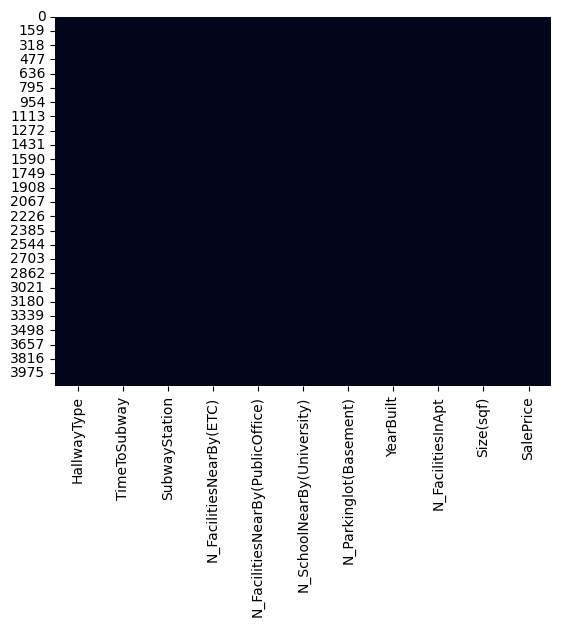

In [17]:
sns.heatmap(df_model.isnull(), cbar=False)

Because there is no Missing Value in all dataset columns, there is no need to carry out special handling for missing values.

## **4.2. Duplicate**

In [18]:
# Check data duplicate
df_model.duplicated().sum()

1422

In [19]:
# Percentage of duplicate data
print('Persentase data duplikat:',len(df_model[df_model.duplicated()])/len(df_model))

Persentase data duplikat: 0.3448944943002668


Because there is no unique column that can be identified, data that has the same value in each column can be called duplicate data. There are 1422 duplicate data in the dataset and the percentage of duplicate data reaches 34.49%. Duplicate data in machine learning datasets can cause bias in the model, causing overfitting because the same data points can be calculated several times. Therefore we will drop all duplicate data.

In [20]:
# Drop duplicate data
df_model.drop_duplicates(inplace=True)

In [21]:
# The number of rows and columns after duplicate data has been dropped
df_model.shape

(2701, 11)

After the duplicate data was dropped, there is now no duplicate data and there are 2,701 data remaining from the previous 4,123 data.

## **4.3. Outlier**

Outliers are data points that are significantly different from the majority of the data. In general, outliers can have a significant impact on the regression model and can distort predictions on outliers. Therefore, it is important to investigate outliers and consider whether existing outliers are valid data points that should be included in the analysis and consider alternative methods for dealing with outliers before deciding to exclude them from the analysis.

In [22]:
num_feature = df_model.describe().columns
num_feature

Index(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

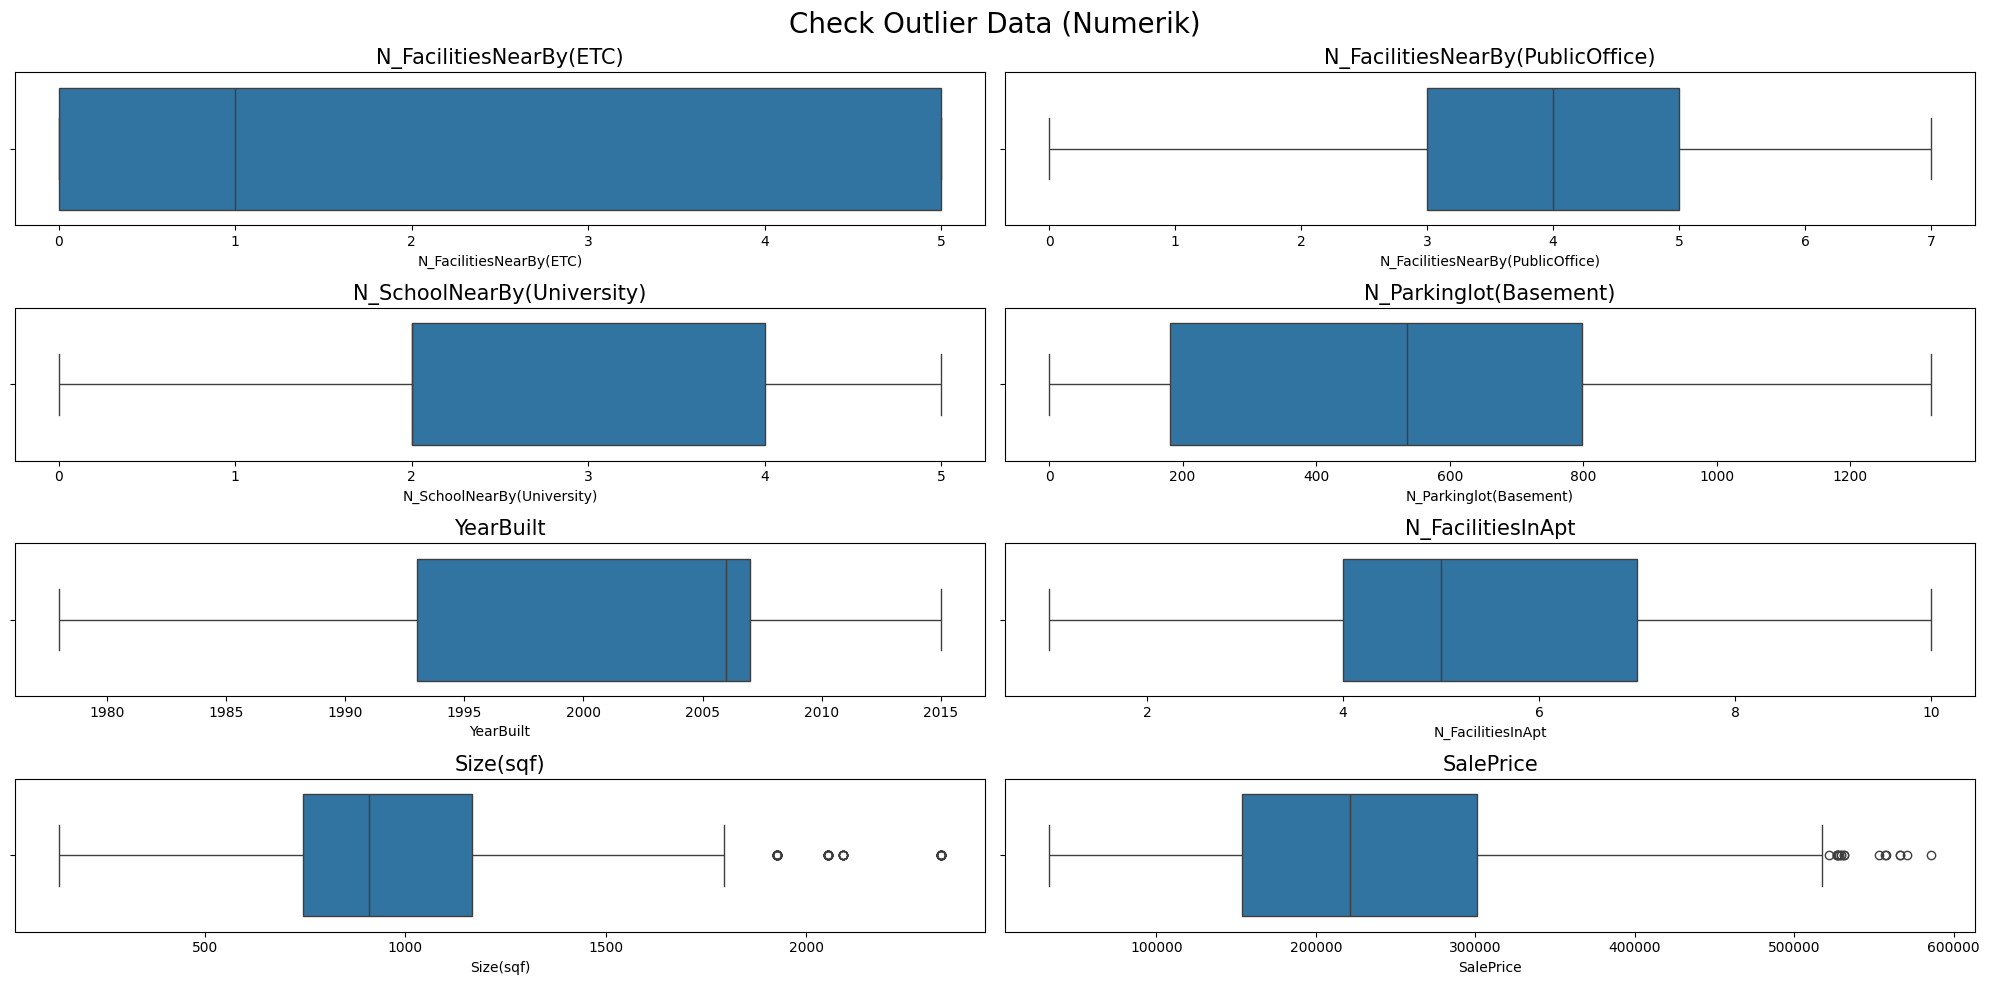

In [23]:
num_feature = df_model.describe().columns
plot = 1

plt.figure(figsize=(20,10))
for feature in num_feature:
    plt.subplot(4,2,plot)
    sns.boxplot(data=df_model, x=feature)
    plt.title(feature, size=15)
    plt.tight_layout()
    plot += 1

plt.suptitle('Check Outlier Data (Numerik)', size=20)
plt.tight_layout()
plt.show()

In [24]:
# Detect outlier
def detect_outliers(df_model):
    outliers = {}
    for col in df_model.columns:
        if df_model[col].dtype in ['int64', 'float64']:
            Q1 = df_model[col].quantile(0.25)
            Q3 = df_model[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1-1.5*IQR
            upper_bound = Q3+1.5*IQR
            outliers[col] = len(df_model[(df_model[col]<lower_bound) | (df_model[col]>upper_bound)])
    return outliers
outliers = detect_outliers(df_model)
for col, count in outliers.items():
    print(f'Column: {col}, Outliers total: {count}')

Column: N_FacilitiesNearBy(ETC), Outliers total: 0
Column: N_FacilitiesNearBy(PublicOffice), Outliers total: 0
Column: N_SchoolNearBy(University), Outliers total: 0
Column: N_Parkinglot(Basement), Outliers total: 0
Column: YearBuilt, Outliers total: 0
Column: N_FacilitiesInApt, Outliers total: 0
Column: Size(sqf), Outliers total: 84
Column: SalePrice, Outliers total: 17


Based on the boxplot, the features that have outliers are the Size(sqf) feature or apartment size and the SalePrice feature or apartment price. The apartment size feature has a total of 84 outliers while the apartment price feature has 17 outliers.  

Now we will look at the descriptive statistics and distribution of the apartment size and apartment price features to determine the appropriate approach for dealing with outliers in the regression model.

In [25]:
# Function to check outlier
def outlier(df_model):
    Q1 = df_model.quantile(0.25)
    Q3 = df_model.quantile(0.75)
    IQR = Q3-Q1
    print(f'''
    IQR: {Q3-Q1}
    Lower bound: {Q1-(1.5*IQR)}
    Upper bound: {Q3+(1.5*IQR)}
    ''')

In [26]:
# Outlier in the apartment size feature
print('Apartment Size')
outlier(df_model['Size(sqf)'])

# Outlier in the apartment prices feature
print('Price Apartment')
outlier(df_model['SalePrice'])

Apartment Size

    IQR: 424.0
    Lower bound: 107.0
    Upper bound: 1803.0
    
Price Apartment

    IQR: 147345.0
    Lower bound: -67478.5
    Upper bound: 521901.5
    


In [27]:
# Descriptive statistical features of apartment size
print('Deskriptif Statistik Ukuran Apartment')
display(df_model['Size(sqf)'].describe())

# Descriptive statistical features of apartment price
print('Deskriptif Statistik Harga Apartment')
display(df_model['SalePrice'].describe())

Deskriptif Statistik Ukuran Apartment


count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

Deskriptif Statistik Harga Apartment


count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

Removing outliers can result in the loss of important information and can affect the overall accuracy of the model. Meanwhile, if outliers are caused by measurement error or other factors that do not reflect the relationship between the dependent and independent variables, then removing outliers may be necessary. 

Based on the descriptive statistics table, even though the features of apartment size and apartment price contain outliers, we will not drop outliers because outliers are not caused by incorrectly entered data or incorrectly measured data. According to domain knowledge, the outliers represent normal data variations such as very large house sizes and very expensive house prices.

# **<center>5. Modelling<center>**

## **5.1. Feature Engineering**

**Scaling**  
Scaling is the process of transforming numerical data in a dataset so that the values are within a certain range with the aim of improving consistency between variables that have different units or ranges so that these variables can be compared fairly. In the context of machine learning, scaling is often used in algorithms that are sensitive to differences in data scale, such as regression algorithms. Scaling can also help optimize algorithm performance, reduce computing time, and improve model interpretability.

In the dataset there are features that have very different ranges, namely the N_Parkinglot(Basement) and Size(Sqf) features. So we will perform a Robust Scaler on the N_Parkinglot(Basement) and Size(sqf) features because this method can improve the consistency of data that has outliers and skewed data distribution, thereby reducing the influence of extreme values on the analysis results. 


**Encoding**  
Encoding is the process of changing data from one format to another, which is usually done on categorical data to become numerical data before it can be used to train a model.

In the dataset there are several features which are categorical data so we need to encode the categorical data. The encoding that will be carried out is as follows:
* `One-Hot Encoding`: HallwayType, because feature is a nominal variable that has 3 categories (we use One-Hot Encoding rather than Binary Encoding because the number of categories is not too many)
* `Binary Encoding`: SubwayStation, because features are nominal variables that have 8 categories (we use Binary Encoding rather than One-Hot Encoding because the number of categories is quite large so we want to create fewer dummy variables and reduce overfitting that occurs if the variables used in building more and more models)
* `Ordinal Encoding`: TimeToSubway, because the feature is an ordinal variable and the categories in the feature are ordered based on the time needed to get to the nearest station

In [28]:
df_model.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [29]:
# Scaling and encoding

ordinal_mapping = [
    {'col':'TimeToSubway', 
    'mapping':{'no_bus_stop_nearby':0, '0min-5min':1, '5min-10min':2, '10min-15min':3, '15-20min':4}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
            ('Robust',RobustScaler(),['N_Parkinglot(Basement)','Size(sqf)']),
            ('OneHotEncoding', OneHotEncoder(drop='first'), ['HallwayType']),
            ('BinaryEncoding', ce.BinaryEncoder(), ['SubwayStation']),
            ('OrdinalEncoding', ce.OrdinalEncoder(), ['TimeToSubway'])
            ], remainder='passthrough')

## **5.2. Train Test Splitting**

Previously we will define the variables x and y. In regression modeling, x is an independent variable that is used to predict the value of y or the dependent variable. Meanwhile, y is the dependent variable or the variable you want to predict.

* Feature = HallwayType, TimeToSubway, SubwayStation, N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, N_FacilitiesInApt, Size(sqf)  
* Target = SalePrice

The data is separated into 2 parts, namely 80% for training data and 20% for testing data. Training data is used to train machine learning models, while testing data is used to test the performance of models that have been trained.

In [30]:
feature = df_model.drop('SalePrice', axis=1)
target = df_model['SalePrice']

In [31]:
# SPlit into training and testing
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=42, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(2160, 10)
(2160,)


## **5.3. Benchmark Model**

After the dataset had been separated into training data and testing data, now we will select a benchmark model to determine the reference model that will be used as a basis for comparison to compare the performance of the new model being developed.

Several regression models that will be used in selecting the benchmark model are as follows:
* `Linear Regression`: A model used to model a linear relationship between one or more input variables and a target variable.
* `Lasso Regression`: A linear regression model used to reduce overfitting by adding the absolute number of coefficients as regularization to the linear regression equation where some coefficients are set to zero so that the model only considers the most important features.
* `Ridge Regression`: A linear regression model used to reduce overfitting by adding the sum of the squares of the coefficients as regularization to the linear regression equation.
* `KNN Regression`: A regression model based on the K-Nearest Neighbors (KNN) algorithm by finding the K nearest neighbors of the input data you want to predict and then predicting the numerical target variable.
* `Decision Tree Regression`: A regression model in the form of a decision tree structure consisting of a series of nodes and edges. 
* `Random Forest Regression`: A regression model that builds several decision trees randomly using different subsets of training data and random subsets of features from the available dataset and each decision tree is generated using bootstrap sampling and feature bagging techniques.
* `XGBoost (Extreme Gradient Boosting) Regression`: A regression model that utilizes gradient boosting techniques with an ensemble learning approach.
* `Support Vector Regression (SVR)`: A regression model used to predict target values based on given features or independent variables with an approach similar to Support Vector Machine (SVM) but with the aim of finding the best hyperplane (line or plane) that can separate the data in feature space.

`K-fold cross validation` is also used as a method for evaluating model performance which is done by dividing the dataset into 5 equal partitions, then the model will be trained on 4 partitions and tested on the remaining partitions. This procedure will be carried out 5 times with different partitions as validation data and training data so that finally the model performance will be calculated based on the average performance. This method is useful for avoiding overfitting or underfitting and for getting better model generalization.

In [32]:
LinReg=LinearRegression()
Lasso=Lasso(random_state=42)
Ridge=Ridge(random_state=42)
KNN=KNeighborsRegressor()
Tree=DecisionTreeRegressor(random_state=42)
Forest=RandomForestRegressor(random_state=42)
XGBoost=xgb.XGBRegressor(random_state=42)
SVR=SVR()

models=[LinReg,Lasso,Ridge,KNN,Tree,Forest,XGBoost,SVR]

score_R2=[]
mean_R2=[]
std_R2=[]

score_RMSE=[]
mean_RMSE=[]
std_RMSE=[]

score_MAE=[]
mean_MAE=[]
std_MAE=[]

score_MAPE=[]
mean_MAPE=[]
std_MAPE=[]

crossval=KFold(n_splits=5)

for i in models:
    model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',i)
    ])

    # R-Squared
    model_cv_R2=cross_val_score(model_pipeline,X_train,y_train,cv=crossval,scoring='r2')
    score_R2.append(model_cv_R2)
    mean_R2.append(model_cv_R2.mean())
    std_R2.append(model_cv_R2.std())

    # RMSE
    model_cv_RMSE=cross_val_score(model_pipeline,X_train,y_train,cv=crossval,scoring='neg_root_mean_squared_error')
    score_RMSE.append(model_cv_RMSE)
    mean_RMSE.append(model_cv_RMSE.mean())
    std_RMSE.append(model_cv_RMSE.std())

    # MAE
    model_cv_MAE=cross_val_score(model_pipeline,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_error')
    score_MAE.append(model_cv_MAE)
    mean_MAE.append(model_cv_MAE.mean())
    std_MAE.append(model_cv_MAE.std())

    # MAPE
    model_cv_MAPE=cross_val_score(model_pipeline,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_percentage_error')
    score_MAPE.append(model_cv_MAPE)
    mean_MAPE.append(model_cv_MAPE.mean())
    std_MAPE.append(model_cv_MAPE.std())

In [33]:
# Result of evaluation

kfold=pd.DataFrame({
    'Model': ['Linear Regression','Lasso','Ridge','KNN','Decision Tree','Random Forest','XGBoost','SVR'],
    'Mean R2': mean_R2,
    'Standar Deviasi R2': std_R2,
    'Mean RMSE': mean_RMSE,
    'Standard Deviasi RMSE': std_RMSE,
    'Mean MAE': mean_MAE,
    'Standard Deviasi MAE': std_MAE,
    'Mean MAPE': mean_MAPE,
    'Standard Deviasi MAPE': std_MAPE
}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)

kfold

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Decision Tree,0.807112,0.013265,-46270.785489,884.248170,-37259.323556,955.537365,-0.190018,0.001301
Random Forest,0.807865,0.013370,-46178.994331,885.653165,-37214.822617,965.821287,-0.190385,0.001295
XGBoost,0.806841,0.013167,-46303.875886,865.292775,-37297.524676,922.828434,-0.190406,0.001068
KNN,0.782673,0.017688,-49095.720081,1221.113625,-39484.083333,1473.590874,-0.202705,0.004851
Linear Regression,0.755169,0.010342,-52161.731578,561.053598,-42090.448273,748.236544,-0.216895,0.005181
Lasso,0.755168,0.010343,-52161.801519,561.102159,-42090.970775,748.139394,-0.216901,0.005173
Ridge,0.755153,0.010346,-52163.415479,562.701170,-42099.964056,747.786206,-0.217047,0.005091
SVR,-0.007083,0.005022,-105855.515131,2178.696754,-85494.536366,3745.076433,-0.559577,0.049023


## **5.4. Voting & Stacking**

In addition, we will also try to combine several different regression models to improve prediction performance. In this technique, multiple regression models are trained on the same training data and then the predictions from each model are combined to give a final prediction. 

We will not use the SVR model because based on previous evaluation results, the SVR model has mean RMSE, MAE, and MAPE values that are much greater than other models, so this means that the prediction quality of the SVR model is not good.

### 5.4.1. Voting Regressor

In [34]:
# Voting Regressor

vc=VotingRegressor([
  ('model1',LinReg),
  ('model2',Lasso),
  ('model3',Ridge),
  ('model4',KNN),
  ('model5',Tree),
  ('model6',Forest),
  ('model7',XGBoost)
])

score_R2_voting=[]
mean_R2_voting=[]
std_R2_voting=[]

score_RMSE_voting=[]
mean_RMSE_voting=[]
std_RMSE_voting=[]

score_MAE_voting=[]
mean_MAE_voting=[]
std_MAE_voting=[]

score_MAPE_voting=[]
mean_MAPE_voting=[]
std_MAPE_voting=[]

crossval=KFold(n_splits=5)

model_pipeline3=Pipeline([
('preprocess',transformer),
('model',vc)
])

# R-Squared
model_cv_R2_voting=cross_val_score(model_pipeline3,X_train,y_train,cv=crossval,scoring='r2')
score_R2_voting.append(model_cv_R2_voting)
mean_R2_voting.append(model_cv_R2_voting.mean())
std_R2_voting.append(model_cv_R2_voting.std())

# RMSE
model_cv_RMSE_voting=cross_val_score(model_pipeline3,X_train,y_train,cv=crossval,scoring='neg_root_mean_squared_error')
score_RMSE_voting.append(model_cv_RMSE_voting)
mean_RMSE_voting.append(model_cv_RMSE_voting.mean())
std_RMSE_voting.append(model_cv_RMSE_voting.std())

# MAE
model_cv_MAE_voting=cross_val_score(model_pipeline3,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_error')
score_MAE_voting.append(model_cv_MAE_voting)
mean_MAE_voting.append(model_cv_MAE_voting.mean())
std_MAE_voting.append(model_cv_MAE_voting.std())

# MAPE
model_cv_MAPE_voting=cross_val_score(model_pipeline3,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_percentage_error')
score_MAPE_voting.append(model_cv_MAPE_voting)
mean_MAPE_voting.append(model_cv_MAPE_voting.mean())
std_MAPE_voting.append(model_cv_MAPE_voting.std())
    

In [35]:
# Result of Voting Evaluation

kfold_voting=pd.DataFrame({
    'Model': ['Voting Regressor'],
    'Mean R2': mean_R2_voting,
    'Standar Deviasi R2': std_R2_voting,
    'Mean RMSE': mean_RMSE_voting,
    'Standard Deviasi RMSE': std_RMSE_voting,
    'Mean MAE': mean_MAE_voting,
    'Standard Deviasi MAE': std_MAE_voting,
    'Mean MAPE': mean_MAPE_voting,
    'Standard Deviasi MAPE': std_MAPE_voting
}).set_index('Model')

kfold_voting

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Voting Regressor,0.801248,0.010692,-46984.60594,550.603985,-38382.128182,710.306153,-0.197593,0.003136


### 5.4.2. Stacking Regressor

In [36]:
# Stacking Regressor

sc=StackingRegressor([
  ('model1',LinReg),
  ('model2',Lasso),
  ('model3',Ridge),
  ('model4',KNN),
  ('model5',Tree),
  ('model6',Forest),
  ('model7',XGBoost)
],final_estimator=XGBoost)

score_R2_stacking=[]
mean_R2_stacking=[]
std_R2_stacking=[]

score_RMSE_stacking=[]
mean_RMSE_stacking=[]
std_RMSE_stacking=[]

score_MAE_stacking=[]
mean_MAE_stacking=[]
std_MAE_stacking=[]

score_MAPE_stacking=[]
mean_MAPE_stacking=[]
std_MAPE_stacking=[]

crossval=KFold(n_splits=5)

model_pipeline4=Pipeline([
('preprocess',transformer),
('model',sc)
])

# R-Squared
model_cv_R2_stacking=cross_val_score(model_pipeline4,X_train,y_train,cv=crossval,scoring='r2')
score_R2_stacking.append(model_cv_R2_stacking)
mean_R2_stacking.append(model_cv_R2_stacking.mean())
std_R2_stacking.append(model_cv_R2_stacking.std())

# RMSE
model_cv_RMSE_stacking=cross_val_score(model_pipeline4,X_train,y_train,cv=crossval,scoring='neg_root_mean_squared_error')
score_RMSE_stacking.append(model_cv_RMSE_stacking)
mean_RMSE_stacking.append(model_cv_RMSE_stacking.mean())
std_RMSE_stacking.append(model_cv_RMSE_stacking.std())

# MAE
model_cv_MAE_stacking=cross_val_score(model_pipeline4,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_error')
score_MAE_stacking.append(model_cv_MAE_stacking)
mean_MAE_stacking.append(model_cv_MAE_stacking.mean())
std_MAE_stacking.append(model_cv_MAE_stacking.std())

# MAPE
model_cv_MAPE_stacking=cross_val_score(model_pipeline4,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_percentage_error')
score_MAPE_stacking.append(model_cv_MAPE_stacking)
mean_MAPE_stacking.append(model_cv_MAPE_stacking.mean())
std_MAPE_stacking.append(model_cv_MAPE_stacking.std())

In [37]:
# Result of Stacking Evaluation

kfold_stacking=pd.DataFrame({
    'Model': ['Stacking Regressor'],
    'Mean R2': mean_R2_stacking,
    'Standar Deviasi R2': std_R2_stacking,
    'Mean RMSE': mean_RMSE_stacking,
    'Standard Deviasi RMSE': std_RMSE_stacking,
    'Mean MAE': mean_MAE_stacking,
    'Standard Deviasi MAE': std_MAE_stacking,
    'Mean MAPE': mean_MAPE_stacking,
    'Standard Deviasi MAPE': std_MAPE_stacking
}).set_index('Model')

kfold_stacking

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Stacking Regressor,0.781767,0.02449,-49143.599786,1739.925149,-39401.188574,1778.271802,-0.203574,0.006333


## **5.5. Summary**

In [38]:
# Summary from result of all model evaluation

summary=pd.DataFrame({
        'Model':['Linear Regression','Lasso Regression','Ridge Regression','KNN Regressor','Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor','SVR','Voting Regressor','Stacking Regressor'],
        'Mean R2': mean_R2+mean_R2_voting+mean_R2_stacking,
        'Standar Deviasi R2': std_R2+std_R2_voting+std_R2_stacking,
        'Mean RMSE': mean_RMSE+mean_RMSE_voting+mean_RMSE_stacking,
        'Standard Deviasi RMSE':  std_RMSE+std_RMSE_voting+std_RMSE_stacking,
        'Mean MAE': mean_MAE+mean_MAE_voting+mean_MAE_stacking,
        'Standard Deviasi MAE':  std_MAE+std_MAE_voting+std_MAE_stacking,
        'Mean MAPE': mean_MAPE+mean_MAPE_voting+mean_MAPE_stacking,
        'Standard Deviasi MAPE':  std_MAPE+std_MAPE_voting+std_MAPE_stacking}).set_index('Model').sort_values(by='Mean MAPE',ascending=False)
summary

,Mean R2,Standar Deviasi R2,Mean RMSE,Standard Deviasi RMSE,Mean MAE,Standard Deviasi MAE,Mean MAPE,Standard Deviasi MAPE
Model,,,,,,,,
Decision Tree Regressor,0.807112,0.013265,-46270.785489,884.248170,-37259.323556,955.537365,-0.190018,0.001301
Random Forest Regressor,0.807865,0.013370,-46178.994331,885.653165,-37214.822617,965.821287,-0.190385,0.001295
XGBoost Regressor,0.806841,0.013167,-46303.875886,865.292775,-37297.524676,922.828434,-0.190406,0.001068
Voting Regressor,0.801248,0.010692,-46984.605940,550.603985,-38382.128182,710.306153,-0.197593,0.003136
KNN Regressor,0.782673,0.017688,-49095.720081,1221.113625,-39484.083333,1473.590874,-0.202705,0.004851
Stacking Regressor,0.781767,0.024490,-49143.599786,1739.925149,-39401.188574,1778.271802,-0.203574,0.006333
Linear Regression,0.755169,0.010342,-52161.731578,561.053598,-42090.448273,748.236544,-0.216895,0.005181
Lasso Regression,0.755168,0.010343,-52161.801519,561.102159,-42090.970775,748.139394,-0.216901,0.005173
Ridge Regression,0.755153,0.010346,-52163.415479,562.701170,-42099.964056,747.786206,-0.217047,0.005091


Based on the evaluation results above, the Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor models have the smallest mean RMSE, mean MAE and mean MAPE values compared to other models where the Decision Tree Regressor is the best model. The smaller the RMSE, MAE and MAPE values indicate that the better the quality of the model predictions. Apart from that, the standard deviation values of RMSE, MAE, and MAPE are also relatively small, indicating that the results are consistent. 

So Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor are benchmarks for the 3 best models and predictions will be made on testing data.

## **5.6. Prediction from Testing Data with Benchmark 3 Best Models**

In [39]:
models={
    'Random Forest':RandomForestRegressor(random_state=42),
    'Decision Tree':DecisionTreeRegressor(random_state=42),
    'XGBoost':xgb.XGBRegressor(random_state=42),
    # 'Voting Regression':VotingRegressor([('model1',LinReg),('model2',Lasso),('model3',Ridge),('model4',KNN),('model5',Tree),('model6',Forest),('model7',XGBoost)])
}

score_R2=[]
score_RMSE=[]
score_MAE=[]
score_MAPE=[]

for i in models:
    model=Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    score_R2.append(r2_score(y_test, y_pred))
    score_RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_MAE.append(mean_absolute_error(y_test, y_pred))
    score_MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning=pd.DataFrame({'R2':score_R2,'RMSE': score_RMSE, 'MAE': score_MAE, 'MAPE': score_MAPE}, index=models.keys()).sort_values(by='MAPE')

score_before_tuning

,R2,RMSE,MAE,MAPE
XGBoost,0.783239,47985.303133,38951.314197,0.198598
Random Forest,0.781391,48189.460034,39010.786937,0.200358
Decision Tree,0.777481,48618.452969,39169.162646,0.202106


After making predictions on testing data, the XGBoost Regressor model is the best model because it has the smallest mean RMSE, mean MAE and mean MAPE values compared to other models.

## **5.7. Hyperparameter Tuning**

Now we will carry out hyperparameter tuning to find the best combination of parameters in a machine learning model with the aim of improving the performance and accuracy of the model. Based on the metrics used, the Decision Tree Regression model is the model that has the best performance when carrying out cross validation, while the XGBoost Regressor model is the model that has the best performance when making predictions on testing data. 

Therefore, we will carry out hyperparameter tuning on both models, namely the Decision Tree Regressor and XGBoost Regressor models to improve model performance and ultimately choose the best final model.

### **5.7.1. Decision Tree Regressor Model**
 
  Decision tree regressor is a machine learning algorithm that uses a tree structure to divide data into increasingly smaller and homogeneous groups based on feature values and each node in the tree predicts the target average value of the group of data that enters that node.

The process of creating a Decision Tree Regressor begins by dividing the data into two groups based on the selected feature values and each group is divided into two more groups based on the other feature values. This process is repeated until the specified stop condition is reached. After the tree has been created, the prediction process is carried out by passing the data through the tree and selecting the target average value of the nodes that corresponds to the feature values. 

There are several Decision Tree model parameters that are similar to Random Forest model parameters because basically Random Forest is a collection of several Decision Trees to produce more accurate and stable predictions. 

The following are the parameters that will be used when hyperparameter tuning the Decision Tree model:
* `splitter`: The strategy used to split a node. The strategies that can be used are best to choose the best split and random to choose the best split randomly.
* `criterion`: Function to measure split quality. The criteria generally used for regression are MSE, MAE, Friedman MSE, and Poisson. 
* `max_depth`: Maximum depth of the decision tree. The deeper the decision tree, the more complex the model and the greater the possibility of overfitting.
* `max_features`: The maximum number of features used in each decision tree to divide a node. The fewer features used, the less likely it is to overfit.  
When performing hyperparameter tuning, the values that will be used are 1 to 50.
* `min_samples_split`: Minimum number of data points required to split a node. The larger the min_samples_split value, the fewer nodes will be divided, thereby reducing the possibility of overfitting, but if the value is too large, the more it can cause underfitting.  
When performing hyperparameter tuning, the values that will be used are 1 to 20.
* `min_samples_leaf`: Minimum number of samples required on each leaf in the decision tree. The larger the min_samples_leaf value, the fewer nodes will be generated and can reduce the possibility of overfitting, but if the value is too large it can cause underfitting.  
When performing hyperparameter tuning, the values that will be used are 1 to 20.

In [40]:
# Hyperparameter Decision Tree

hyperparam_tree={
        'modeling__splitter': ['best','random'],
        'modeling__criterion':['absolute_error','squared_error','friedman_mse','poisson'],
        'modeling__max_depth':[np.arange(1,51),None],
        'modeling__max_features':['auto','sqrt','log2',None],
        'modeling__min_samples_split':list(np.arange(2,21)),
        'modeling__min_samples_leaf':list(np.arange(1,21))
}

In [41]:
# Algoritma (benchmark model)

Tree=DecisionTreeRegressor(random_state=42)

pipe_model_tree = Pipeline([
        ('preprocessing', transformer),
        ('modeling', Tree)
 ])

crossval=KFold(n_splits=5)

# RandomizedSearch

randomsearch_tree=RandomizedSearchCV(
        estimator=pipe_model_tree,                # Model yang hendak di tuning
        param_distributions=hyperparam_tree,      # Hyperparameter
        cv=crossval,                                 # 5 fold cross validation
        scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
        n_jobs=-1,                                # Memaksimalkan processor
        refit='neg_mean_absolute_percentage_error',
        random_state=42
)

In [42]:
# Fit model dengan hyperparameter tuning pada data training

randomsearch_tree.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']...
                                        'modeling__min_samples_leaf': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19,
                                                                       20],
                                        'modeling__min_samples_split': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16, 17,
                                                                        18, 19,
                                                                        20],
                                        'modeling__splitter': ['best',
                                                               'random']},
                   random_state=42, refit='neg_mean_absolute_percentage_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [43]:
# Hasil hyperparamer tuning dalam bentuk dataframe yang diurutkan berdasarkan MAPE

pd.DataFrame(randomsearch_tree.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__splitter,param_modeling__min_samples_split,param_modeling__min_samples_leaf,param_modeling__max_features,param_modeling__max_depth,param_modeling__criterion,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
0,0.177229,0.012853,0.039526,0.009637,best,11,3,None,None,poisson,...,783.168722,2,-0.190759,-0.196198,-0.192238,-0.198822,-0.197101,-0.195024,0.003036,2
5,0.177235,0.044587,0.105742,0.045001,best,18,15,None,None,squared_error,...,876.674908,3,-0.185296,-0.200411,-0.196622,-0.200156,-0.203301,-0.197157,0.006298,3
3,0.583599,0.154489,0.043031,0.013449,best,18,2,None,None,absolute_error,...,1365.511254,1,-0.180799,-0.185806,-0.184404,-0.182708,-0.180838,-0.182911,0.001970,1
9,0.118987,0.040363,0.041454,0.010737,best,10,4,log2,None,friedman_mse,...,815.983676,4,-0.193109,-0.199732,-0.197655,-0.200178,-0.205436,-0.199222,0.003990,4
7,0.081728,0.010729,0.037727,0.014579,best,3,3,sqrt,None,poisson,...,891.833713,5,-0.190828,-0.196512,-0.197516,-0.217651,-0.204412,-0.201384,0.009208,5
6,0.142120,0.066241,0.036156,0.005106,best,20,17,log2,None,squared_error,...,2336.065518,6,-0.190067,-0.222414,-0.214595,-0.219354,-0.232179,-0.215722,0.014059,6
1,0.134348,0.024414,0.000000,0.000000,random,14,16,auto,None,friedman_mse,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,0.104743,0.025565,0.000000,0.000000,best,14,3,sqrt,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",absolute_error,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,0.091891,0.024489,0.000000,0.000000,random,16,8,auto,None,poisson,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
8,0.136601,0.043782,0.000000,0.000000,random,18,5,auto,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",squared_error,...,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [44]:
# Best_parameter

print('Parameter terbaik:')
randomsearch_tree.best_params_

Parameter terbaik:


{'modeling__splitter': 'best',
 'modeling__min_samples_split': 18,
 'modeling__min_samples_leaf': 2,
 'modeling__max_features': None,
 'modeling__max_depth': None,
 'modeling__criterion': 'absolute_error'}

In [45]:
# Best score 

print(f'Nilai MAPE setelah hyperparameter tuning: {randomsearch_tree.best_score_}')

Nilai MAPE setelah hyperparameter tuning: -0.18291110559653512


In [46]:
model = {'Decision Tree': DecisionTreeRegressor(random_state=42)}

# Define model terhadap estimator terbaik
tree_tuning = randomsearch_tree.best_estimator_

# Fitting model
tree_tuning.fit(X_train, y_train)

# Prediksi to data testing
y_pred_tree_tuning = tree_tuning.predict(X_test)

nilai_R2_tree_tuning=r2_score(y_test, y_pred_tree_tuning)
nilai_RMSE_tree_tuning=np.sqrt(mean_squared_error(y_test, y_pred_tree_tuning))
nilai_MAE_tree_tuning=mean_absolute_error(y_test, y_pred_tree_tuning)
nilai_MAPE_tree_tuning=mean_absolute_percentage_error(y_test, y_pred_tree_tuning)

score_after_tuning_tree = pd.DataFrame({'R2': nilai_R2_tree_tuning, 'RMSE': nilai_RMSE_tree_tuning, 'MAE': nilai_MAE_tree_tuning, 'MAPE': nilai_MAPE_tree_tuning}, index=model.keys())
score_after_tuning_tree

,R2,RMSE,MAE,MAPE
Decision Tree,0.768568,49582.590817,38131.631238,0.191178


In [47]:
# Before hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['Decision Tree']).T

,R2,RMSE,MAE,MAPE
Decision Tree,0.777481,48618.452969,39169.162646,0.202106


In [48]:
# After hyperparameter tuning

score_after_tuning_tree

,R2,RMSE,MAE,MAPE
Decision Tree,0.768568,49582.590817,38131.631238,0.191178


The performance of the Decision Tree Regressor model on testing data after hyperparameter tuning showed an increase because the RMSE, MAE, and MAPE values decreased after hyperparameter tuning, although the decrease was not very significant. This shows that the prediction error value is getting smaller and the model is successful in making more accurate predictions. 

Decision Tree Regressor is suitable for predicting continuous values such as in the dataset used, namely predicting apartment prices in Daegu, South Korea. Therefore, we will choose the Decision Tree Regressor model using tuned parameters as the best final model for predicting apartment prices in Daegu, South Korea.

### **5.7.2. XGBoost Regressor Model**

The code defines hyperparameters for an XGBoost model and creates a hyperparameter search space for them. The variables are as follows:

- `max_depth`: the maximum depth of each tree in the XGBoost model. The values range from 1 to 10.

- `learning_rate`: the learning rate used by the XGBoost model. The values range from 0.01 to 1.

- `n_estimators`: the number of trees in the XGBoost model. The values range from 100 to 200.

- `subsample`: the percentage of the training data used for each tree in the XGBoost model. The values range from 20% to 90%.

- `gamma`: the minimum reduction in impurity required to split a leaf node in the XGBoost model. The values range from 1 to 10. The higher the value, the more conservative (simpler) the model will be.

- `colsample_bytre`e: the number of features used for each tree in the XGBoost model as a percentage of the total number of columns in the training set. The values range from 10% to 90%.

- `reg_alpha`: the regularization alpha used in the XGBoost model. The values range from 0.001 to 10. The higher the value, the more conservative (simpler) the model will be.

Finally, the hyperparam_space_xgb variable is a dictionary that defines the hyperparameters and their corresponding value ranges for the XGBoost model.

In [49]:
# Tree depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# The number or tree
n_estimators = list(np.arange(100, 201))

# Percentage of rows per tree (of the total number of rows in the training set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# Number of features used for each tree (as a percentage of the total number of columns in the training set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


# Hyperparam space XGboost
hyperparam_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [50]:
# Benchmark the model with hyperparameter tuning
xgb_ = xgb.XGBRegressor(random_state=42, verbosity=0)

# Define algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', xgb_)
        ])

crossval = KFold(n_splits=5)

# Hyperparameter tuning
randomsearch_xgb = RandomizedSearchCV(
    estimator= estimator_xgb, 
    param_distributions = hyperparam_xgb,
    # n_iter = 50,
    cv = crossval, 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Only able to choose one metric for optimization
    random_state = 42 
)

In [51]:
# Fitting the training data to find the best parameters
randomsearch_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Robust',
                                                                               RobustScaler(),
                                                                               ['N_Parkinglot(Basement)',
                                                                                'Size(sqf)']),
                                                                              ('OneHotEncoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('BinaryEncoding',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_mean_absolute_percentage_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [52]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan R-Squared
pd.DataFrame(randomsearch_xgb.cv_results_).sort_values(by=['rank_test_r2', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,0.257228,0.017637,0.040076,0.003101,0.8,0.464159,120,3,0.68,4,...,868.459430,2,-0.188403,-0.191301,-0.190048,-0.188814,-0.191033,-0.189920,0.001156,1
2,0.602310,0.356882,0.042881,0.022708,0.9,0.007743,141,3,0.94,6,...,955.836315,5,-0.188117,-0.190797,-0.193174,-0.190946,-0.193564,-0.191320,0.001957,6
9,0.261842,0.014482,0.040599,0.006432,0.9,0.059948,105,5,0.38,3,...,1037.893213,1,-0.189597,-0.190143,-0.190792,-0.188619,-0.191685,-0.190167,0.001041,3
8,0.398526,0.066595,0.043844,0.007730,0.4,0.002783,166,5,0.19,2,...,1011.095726,3,-0.187283,-0.192592,-0.189382,-0.191330,-0.189357,-0.189989,0.001826,2
0,1.481104,0.089862,0.056262,0.008496,0.8,0.059948,197,10,0.86,7,...,923.975490,4,-0.187163,-0.191167,-0.192048,-0.189988,-0.191847,-0.190443,0.001791,4


In [53]:
# Parameter terbaik 

print('Parameter terbaik:')
randomsearch_xgb.best_params_

Parameter terbaik:


{'model__subsample': 0.8,
 'model__reg_alpha': 0.46415888336127775,
 'model__n_estimators': 120,
 'model__max_depth': 3,
 'model__learning_rate': 0.68,
 'model__gamma': 4,
 'model__colsample_bytree': 0.6}

In [54]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', randomsearch_xgb.best_score_)
print('Best_params:', randomsearch_xgb.best_params_)

XGBoost
Best_score: -0.18991986651482914
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 120, 'model__max_depth': 3, 'model__learning_rate': 0.68, 'model__gamma': 4, 'model__colsample_bytree': 0.6}


In [55]:
# Model XGBoost
model = {'XGBoost': xgb.XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = randomsearch_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'R2': r2_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
print('Testing Result After Tuning')
score_after_tuning_xgb

Testing Result After Tuning


,R2,RMSE,MAE,MAPE
XGBoost,0.787046,47562.120493,38599.283257,0.194919


In [56]:
# Before hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['XGBoost']).T

,R2,RMSE,MAE,MAPE
XGBoost,0.783239,47985.303133,38951.314197,0.198598


In [57]:
# After hyperparameter tuning
score_after_tuning_xgb

,R2,RMSE,MAE,MAPE
XGBoost,0.787046,47562.120493,38599.283257,0.194919


The performance of the XGBoost Regressor model on testing data after hyperparameter tuning showed an increase because the RMSE, MAE, and MAPE values decreased after hyperparameter tuning, although the decrease was not very significant. This shows that the prediction error value is getting smaller and the model is successful in making more accurate predictions. 

The XGboost Regressor is suitable for predicting continuous values such as in the dataset used, namely predicting apartment prices in Daegu, South Korea. Therefore, we will choose the XGboost Regressor model using tuned parameters as the best final model for predicting apartment prices in Daegu, South Korea.

## **5.8. Residual Plot**

The XGBoost model will be evaluated exploratively using residual plots to see whether the XGBoost model can predict values accurately or not. The residual plot is a graph that shows the difference between the actual value and the value predicted by the model.

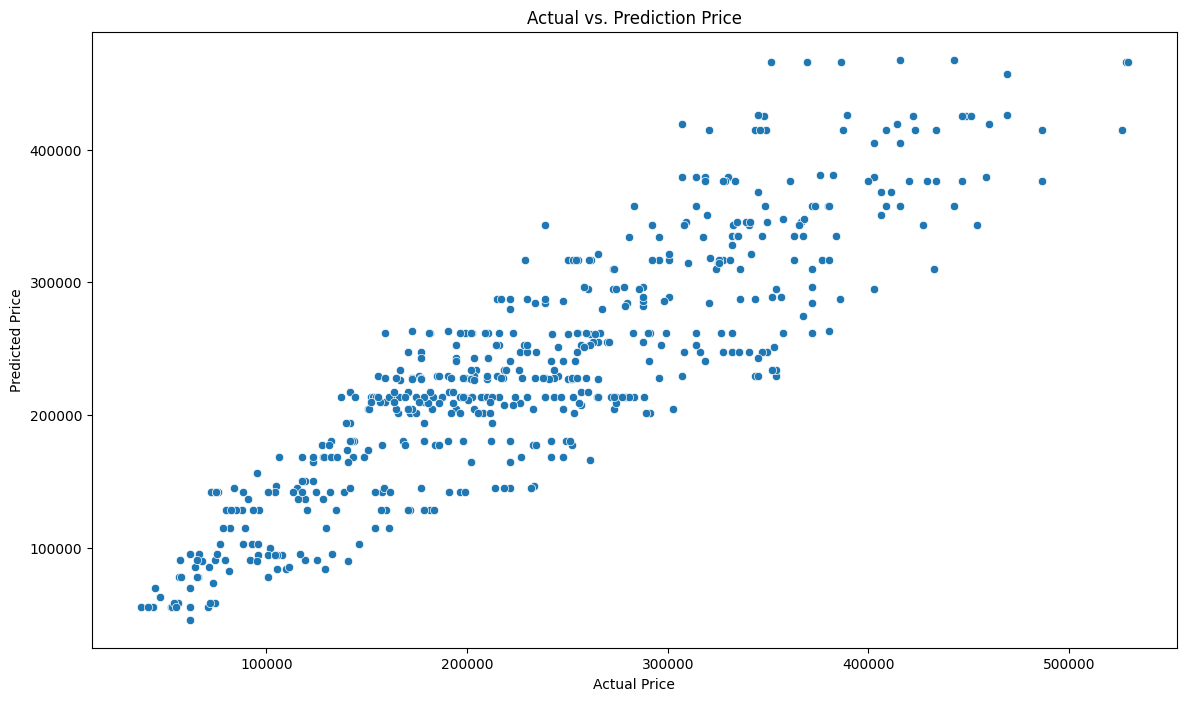

In [58]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',  
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

In [59]:
# Residual = y_actual - y_prediksi
residual = y_test-y_pred_xgb_tuning

df_residual = pd.DataFrame({
    'y_pred': y_pred_xgb_tuning,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
2927,414319.18750,19458.81250
1427,289279.46875,67357.53125
2081,213754.68750,-11985.68750
352,284220.68750,87460.31250
1861,136902.87500,-17433.87500


<Axes: xlabel='SalePrice'>

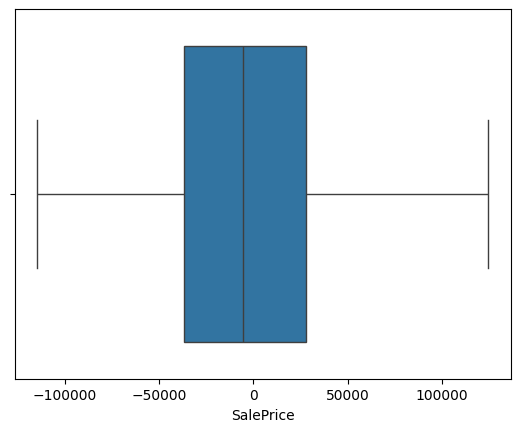

In [60]:
# Check whether the residuals have outlier

sns.boxplot(data=df_residual,x=residual) 

Based on the boxplot above, the residuals have no outliers. This also means that RMSE, MAE, and MAPE are suitable for use as evaluation metrics in selecting the best model because outliers do not affect these three evaluation metrics.

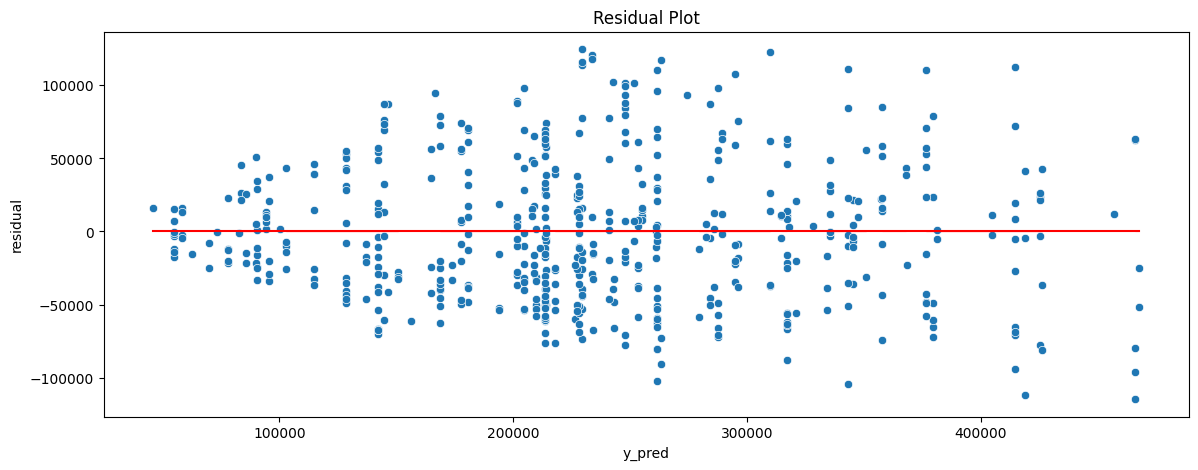

In [61]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red')
plt.title('Residual Plot')
plt.show()

Based on the residual plot above, the residuals appear to be randomly distributed along the horizontal axis and do not have a particular pattern, indicating that the regression model is generally suitable for apartment price data in Daegu, South Korea.

## **5.9. Feature Importance**

We will evaluate the features that influence apartment prices in Daegu, South Korea in the Decision XGBoost model through the feature importance function.

In [62]:
# Feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp.to_frame(name='Feature Importances')

,Feature Importances
OneHotEncoding__HallwayType_terraced,0.764231
remainder__N_FacilitiesNearBy(ETC),0.100243
Robust__Size(sqf),0.035617
remainder__N_FacilitiesInApt,0.034851
remainder__YearBuilt,0.022182
BinaryEncoding__SubwayStation_3,0.011790
Robust__N_Parkinglot(Basement),0.007103
OneHotEncoding__HallwayType_mixed,0.006031
OrdinalEncoding__TimeToSubway,0.004452
remainder__N_FacilitiesNearBy(PublicOffice),0.003652


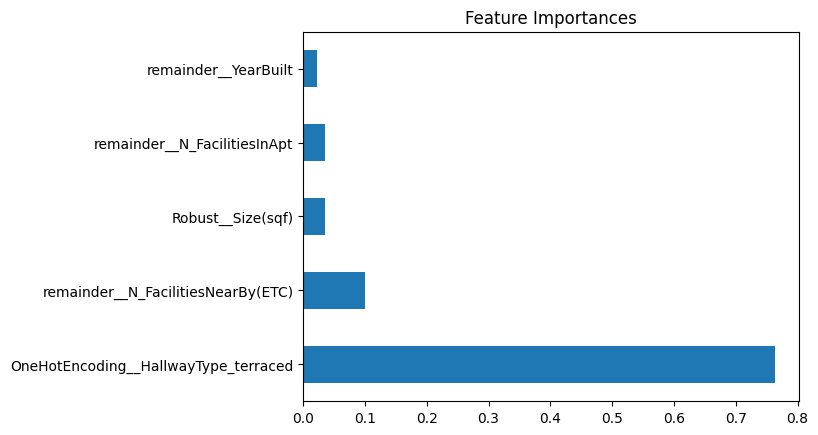

In [63]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

In the XGboost Regressor model with tuned parameters, the features that most influence apartment prices in Daegu, South Korea are the type of terraced apartment, the number of nearby facilities, and the size of the apartment.

# **<center>6. Conclusion<center>**

The evaluation metrics used for regression models are RMSE, MAE, and MAPE because these three metrics are the evaluation metrics most commonly used for regression models and help identify how well the model is able to generalize patterns found in training data to new data. However, MAPE was chosen as the most important evaluation metric to provide results that are easy to interpret and can help explain prediction errors to stakeholders, namely real estate agents. Based on the metric evaluation, the final model chosen to predict apartment prices in Daegu, South Korea is the tuned XGboost Regressor model where the model has a MAPE value of 19.4%, so this means that if the model is used to predict apartment prices within the same price range has been trained on the model (the minimum apartment price is 32,743 won and the maximum apartment price is 521,902 won) then the average percentage of absolute error between the predicted apartment price and the actual value of the apartment price is 19.4%. Based on Lewis (1982), a MAPE value of 10% to 20% can be interpreted as a model that has good forecasting capabilities.

However, apartment price predictions can also miss the actual apartment price due to bias that may occur due to the limited features used so that the features in the dataset do not adequately represent the factors that influence apartment prices in Daegu, South Korea. 

Based on the final model chosen, the features that most influence apartment prices in Daegu, South Korea are the type of terraced apartment, the number of nearby facilities, and the size of the apartment. By using the final selected model, we can help real estate agents determine the right selling price for apartments in the city of Daegu, South Korea so that they can increase the level of success in marketing and selling these apartment units. 

Before there was a regression model, we only had raw data regarding apartment characteristics and apartment prices in Daegu which was difficult to interpret and did not provide useful insight into the relationship between apartment characteristics and apartment prices. With a regression model, we can conduct a more detailed analysis and gain a better understanding of how apartment characteristics and apartment prices are related. Apart from that, the regression model can also be used to predict changes in the value of apartment prices that might occur if the characteristics of the apartment change. In this case, the impact after the regression model is greater than before the regression model, because real estate agents can take more appropriate actions or decisions based on the results of the regression model analysis, namely being able to determine the appropriate apartment price.

# **<center>7. Recommendation<center>**

The following are some recommendations that can be given:

1. Consider adding features that have a stronger relationship to the price of an apartment in Daegu, South Korea, such as what floor the apartment is on, the year the apartment was sold, the number of rooms in the apartment (number of bedrooms, bathrooms, kitchen), information on the inclusiveness of furniture in the apartment, and so on. 

2. Expand the dataset by collecting more data that has more updated information regarding apartment prices in Daegu, South Korea to increase the relevance of the dataset when building prediction models so that it can produce better prediction model accuracy and help improve regression models to learn patterns in the data.

# **<center>8. Save Machine Learning<center>**

In [64]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', xgb.XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Daegu_Apartment_XGB.sav', 'wb'))

In [65]:
# Load model
filename = 'Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [66]:
mean_absolute_percentage_error(y_test,loaded_model.predict(X_test))

0.19859766804431944

In [67]:
np.sqrt(mean_squared_error(y_test,loaded_model.predict(X_test)))

47985.30313330841

In [68]:
# df_model.to_excel('data_daegu.xlsx', index=False)